# Problem 1:
In this problem, we are going to learn the optimal strategy of selecting the right path. Consider the a naive setting of the shortest path problem with only 2 arcs from source 1 to sink 2, as shown in Figure below.

<img src="2nodes.png">

The optimal path can be obtained by solving $\min (c_1,c_2)$ where $c_1$ and $c_2$ are the cost on the arcs respectively. While it is a naive problem, we can still formulate it as an integer program (whose LP relaxation is tight):

$$\begin{split}
\min & \quad c_1x_1+c_2x_2\\
\mbox{s.t.} & \quad x_1+x_2=1\\
& \quad x_1, x_2 \in \{0,1\}.
\end{split}$$

After learning an optimal strategy, when we see a new instance with $(c_1,c_2)$, instead of solving an optimization problem(even a simple one), we can use the strategy to select the path. 

###  (1) Generate 50 traning samples and 50 test samples with $c_1$ uniformly distributed in $[2,5]$ and $c_2$ uniformly distributed in $[3,7]$. For each data point with $(c_1,c_2)$, solve for the optimal path $(x_1^*,x_2^*)$. \[For optimization part, we used a solver.\] 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#set random seed
np.random.seed(23)

In [2]:
## Generate training set for c1 and c2
c1_training= np.random.uniform(2,5,50)
c2_training= np.random.uniform(3,7,50)
## Generate test set for c1 and c2
c1_test= np.random.uniform(2,5,50)
c2_test= np.random.uniform(3,7,50)

In [3]:
# function for optimal path
from gurobipy import *
def get_solution(c1,c2):
    m = Model("P1 model")

    # Create variables
    x1 = m.addVar(vtype=GRB.BINARY, name="x12")
    x2 = m.addVar(vtype=GRB.BINARY, name="x13")

    # Set objective
    m.setObjective(c1*x1+c2*x2, GRB.MINIMIZE)

    # Add constraint: 
    m.addConstr(x1 + x2  == 1, "c0")
    m.params.outputflag = 0; # suppress the output 
    m.optimize()
    return [round(i.x) for i in m.getVars()]

In [4]:
# solve for the optimal path (training)
path_training=[]
for i in range (0,50):
    path=get_solution(c1_training[i],c2_training[i])
    path_training.append(path)

Using license file C:\Users\Brian\gurobi.lic
Academic license - for non-commercial use only


In [5]:
# solve for the optimal path (testing)
path_test=[]
for i in range (0,50):
    path=get_solution(c1_test[i],c2_test[i])
    path_test.append(path)

In [6]:
# Number of path in each set
print("The number of [1,0] path in training set is", path_training.count([1,0]))
print("The number of [0,1] path in training set is", path_training.count([0,1]))


print("The number of [1,0] path in test set is", path_test.count([1,0]))
print("The number of [0,1] path in test set is", path_test.count([0,1]))

The number of [1,0] path in training set is 39
The number of [0,1] path in training set is 11
The number of [1,0] path in test set is 44
The number of [0,1] path in test set is 6


###  (2) Consider the strategy learning task as a binary classification problem with classes labeled by two feasible paths, i.e., $(x_1^*,x_2^*)=(1,0)$ or $(x_1^*,x_2^*)=(0,1)$. Develop classification models using Logistic Regression, SVM and Classification tree. 

In [7]:
#Training set
#Set up a dataframe for training set
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
training_all={'c1_training': c1_training, 'c2_training': c2_training, 'path_training':path_training}
training_df = pd.DataFrame(training_all)

#Label the path with "1" and "0" for [1,0] and [0,1] respectively
training_df['y_train']=""
for i in range (0,50):
    training_df['y_train'][i] = training_df['path_training'][i][0]
#Convert the type from object to numeric
training_df['y_train'] = pd.to_numeric(training_df['y_train'])

In [8]:
#store independent variables of training data
X_train = training_df[['c1_training','c2_training']]

#store dependent variables of training data
y_train = training_df['y_train']

In [9]:
#test set
#Set up a dataframe for test set
test_all={'c1_test': c1_test, 'c2_test': c2_test, 'path_test':path_test}
test_df = pd.DataFrame(test_all)

#Label the path with "1" and "0" for [1,0] and [0,1] respectively
test_df['y_test']=""
for i in range (0,50):
    test_df['y_test'][i] = test_df['path_test'][i][0]
#Convert the type from object to numeric
test_df['y_test'] = pd.to_numeric(test_df['y_test'])

In [10]:
#store independent variables of training data
X_test = test_df[['c1_test','c2_test']]

#store dependent variables of training data
y_test = test_df['y_test']

#### Develop classification model using Logistic Regression

In [11]:
#Develop classification model using Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#Store the prediction result into the dataframe
test_df['y_pred_lr']=y_pred_lr

#### Develop classification model using SVM

In [12]:
#Develop classification model using SVM 
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

#Store the prediction result into the dataframe
test_df['y_pred_svm']=y_pred_svm

#### Develop classification model using Classification tree

In [13]:
#Develop classification model using Classification tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

#Store the prediction result into the dataframe
test_df['y_pred_dt']=y_pred_dt

###  (3) Evaluate the performance of the classification models above. 

In [14]:
# compare by plain accuracy
test_df['acc_lr'] = test_df['y_test']==test_df['y_pred_lr']
test_df['acc_svm'] = test_df['y_test']==test_df['y_pred_svm']
test_df['acc_dt'] = test_df['y_test']==test_df['y_pred_dt']

In [15]:
#Accuracy of training set
print('Accuracy score with using Logistic Regression: '+ str(lr.score(X_train, y_train)))
print('Accuracy score with using SVM: '+ str(svm.score(X_train, y_train)))
print('Accuracy score with using Classification tree: '+ str(dt.score(X_train, y_train)))

Accuracy score with using Logistic Regression: 1.0
Accuracy score with using SVM: 1.0
Accuracy score with using Classification tree: 1.0


In [16]:
#Accuracy of test set
print('Using Logistic Regression, ',sum(test_df['acc_lr']), 'out of 50 test data are predicted correctly')
print('Using SVM, ',sum(test_df['acc_svm']), 'out of 50 test data are predicted correctly')
print('Using Classification Tree, ',sum(test_df['acc_dt']), 'out of 50 test data are predicted correctly')

Using Logistic Regression,  48 out of 50 test data are predicted correctly
Using SVM,  48 out of 50 test data are predicted correctly
Using Classification Tree,  47 out of 50 test data are predicted correctly


In [17]:
#Accuracy of test set
print('Accuracy score with using Logistic Regression: '+ str(lr.score(X_test, y_test)))
print('Accuracy score with using SVM: '+ str(svm.score(X_test, y_test)))
print('Accuracy score with using Classification tree: '+ str(dt.score(X_test, y_test)))

Accuracy score with using Logistic Regression: 0.96
Accuracy score with using SVM: 0.96
Accuracy score with using Classification tree: 0.94


In general, we can see that all three models can attain a high prediction accuracy, since all of them are with higher than 90% correct prediction in test set. 

Logistic Regression model and SVM model seem to be more accurate than Classification tree model in this trial, but not significant and not necessarily in a way that in other trial with setting other random seed , Classification tree model could be as accurate as the others.

In [18]:
#Print out the result
pd.set_option('display.max_rows', 10)
test_df

,c1_test,c2_test,path_test,y_test,y_pred_lr,y_pred_svm,y_pred_dt,acc_lr,acc_svm,acc_dt
0,3.930381,5.952160,"[1, 0]",1,1,1,1,True,True,True
1,3.705049,5.265256,"[1, 0]",1,1,1,1,True,True,True
2,2.720546,6.177517,"[1, 0]",1,1,1,1,True,True,True
3,2.887120,6.709040,"[1, 0]",1,1,1,1,True,True,True
4,2.015075,3.323449,"[1, 0]",1,1,1,1,True,True,True
...,...,...,...,...,...,...,...,...,...,...
45,2.894699,4.922747,"[1, 0]",1,1,1,1,True,True,True
46,2.555579,6.963164,"[1, 0]",1,1,1,1,True,True,True
47,4.342558,4.972993,"[1, 0]",1,1,1,1,True,True,True
48,2.465644,6.311469,"[1, 0]",1,1,1,1,True,True,True


### (4) Briefly explain the optimal strategy obtained from Logistic Regression, SVM, and Tree respectively. 

#### Logistic Regression:

[[-1.91504398  1.67297515]]
[1.18247585]


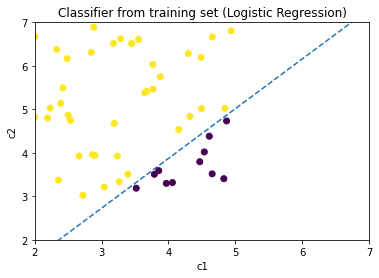

In [19]:
print(lr.coef_)
print(lr.intercept_)
# Graph for logistic regression (training set)
a = lr.coef_[0][0]
b = lr.coef_[0][1]
c = lr.intercept_[0]
x_plt = [1, 2, 3, 4, 5, 6, 7]
y_plt = [(-a/b) * i + (-c/b) for i in x_plt]

plt.scatter(training_df['c1_training'], training_df['c2_training'], c=training_df['y_train'])
plt.title('Classifier from training set (Logistic Regression)')
plt.plot(x_plt, y_plt, '--')
plt.ylabel('c2')
plt.xlabel('c1')
plt.xlim(2,7)
plt.ylim(2,7)
plt.show()

The boundary classifier (blue dotted line) was trained from the above training datapoints.

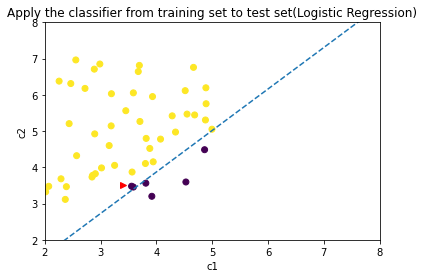

In [20]:
# Graph for logistic regression (test set)
a = lr.coef_[0][0]
b = lr.coef_[0][1]
c = lr.intercept_[0]
x_plt = [1, 2, 3, 4, 5, 6, 7, 8]
y_plt = [(-a/b) * i + (-c/b) for i in x_plt]

plt.scatter(test_df['c1_test'], test_df['c2_test'], c=test_df['y_test'])
plt.plot(x_plt, y_plt, '--')
plt.ylabel('c2')
plt.xlabel('c1')
plt.title('Apply the classifier from training set to test set(Logistic Regression)')
plt.plot(3.4,3.5, marker='>',c='red')
plt.xlim(2,8)
plt.ylim(2,8)
plt.show()

The graph above is divided by the boundary classifier trained from the training set (/previous graph).


The dots above are the datapoints from test set. 

The model would predict the y_label "1" (which means the path [1, 0]) if the datapoint is at the left side of the line.

Meanwhile, the model would predict the y_label "0" (which means the path [0, 1]) if the datapoint is at the right side of the line.


The color of the datapoints represents the true optimal path/ true label of the testing set, yellow dot for the true optimal path [1, 0] and purple dot for the true optimal path [0, 1].

We can note the two wrongly predicted datapoints [pointed by red arrow and noted from answer for question (3)].

#### SVM:

[[-1.9880577  1.7547084]]
[1.10148766]


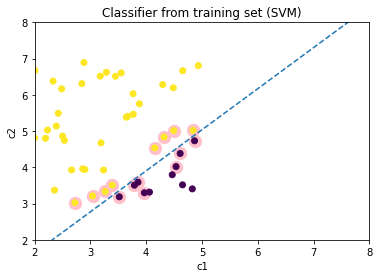

In [21]:
print(svm.coef_)
print(svm.intercept_)

# Graph for SVM (training set)
d = svm.coef_[0][0]
e = svm.coef_[0][1]
f = svm.intercept_[0]
x_plt_svm = [1, 2, 3, 4, 5, 6, 7, 8]
y_plt_svm = [(-d/e) * i + (-f/e) for i in x_plt_svm]


plt.scatter(svm.support_vectors_[:,0],svm.support_vectors_[:,1], c='pink', s=150)
plt.scatter(training_df['c1_training'], training_df['c2_training'], c=training_df['y_train'])
plt.plot(x_plt_svm, y_plt_svm, '--')
plt.ylabel('c2')
plt.xlabel('c1')
plt.title('Classifier from training set (SVM)')
plt.xlim(2,8)
plt.ylim(2,8)
plt.show()

The training datapoints with pink circles are those support vectors which decide the margin and hence the decision boundary (linear classifier).

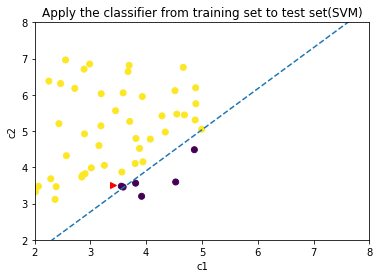

In [22]:
# Graph for SVM (test set)
d = svm.coef_[0][0]
e = svm.coef_[0][1]
f = svm.intercept_[0]
x_plt_svm = [1, 2, 3, 4, 5, 6, 7, 8]
y_plt_svm = [(-d/e) * i + (-f/e) for i in x_plt_svm]

plt.scatter(test_df['c1_test'], test_df['c2_test'], c=test_df['y_test'])
plt.plot(x_plt_svm, y_plt_svm, '--')
plt.ylabel('c2')
plt.xlabel('c1')
plt.title('Apply the classifier from training set to test set(SVM)')
plt.plot(3.4,3.5, marker='>',c='red')
plt.xlim(2,8)
plt.ylim(2,8)
plt.show()

The graph above is divided by the decision boundary from the training set (previous graph).

The dots above are the datapoint from test set. 

The model would predict the y_label "1" (which means the path [1, 0]) if the datapoint is at the left side of the line.

Meanwhile, the model would predict the y_label "0" (which means the path [0, 1]) if the datapoint is at the right side of the line.

The color of the datapoints represents the true optimal path/ true label of the testing set, yellow dot for the true optimal path [1, 0] and purple dot for the true optimal path [0, 1].

Text(0, 0, '')

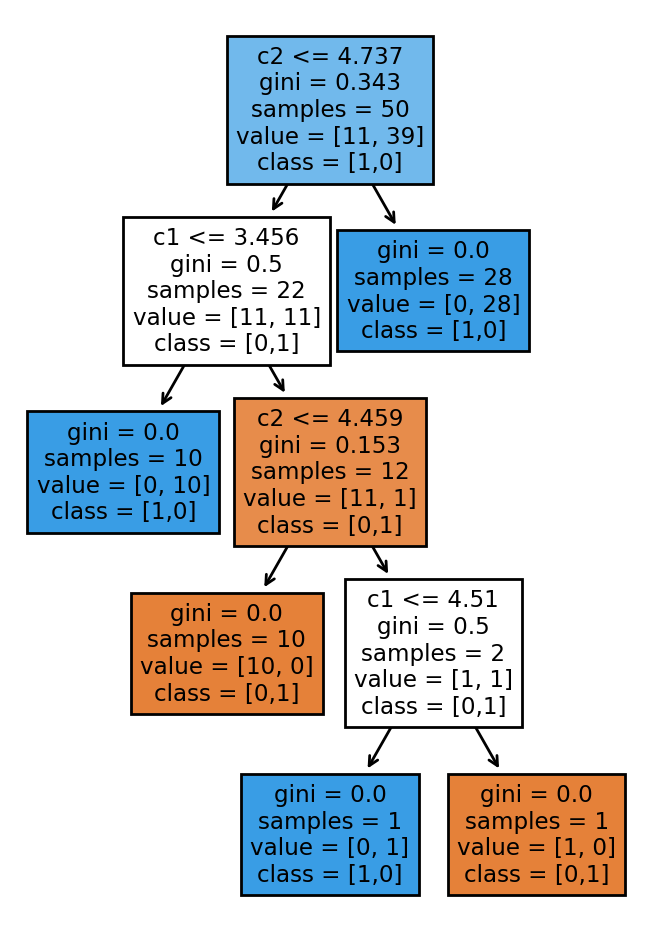

In [23]:
# optimal strategy obtained from Tree
import sklearn
from sklearn import tree
fig, axes = plt.subplots(figsize = (4,6), dpi=200)
tree.plot_tree(dt, filled=True, feature_names=['c1', 'c2'], class_names=['[0,1]','[1,0]'])
fig.text(0, 0,'')

The above graph shows the decision rules in the tree model. 

For example, the model will first examine if c2 is smaller or equal to 4.737. If so (go to the left), the model would then examine if c1 is smaller than or equal to 3.456 . If so, it would predict the optimal path as [1,0].
If c1 is greater than 3.456 (go to the right), then it would further go down the tree plot to predict the optimal path.

###  (5) Insight from the result 

This is a naive setting of the shortest path problem with only 2 arcs from source 1 to sink 2, which means that there are only 2 features (c1 and c2) and only two labels (/pahts) to classify in this classification problem. All three models can get a high accurary score (all higher than 90%) as mentioned above. 

The "true" decision boundry is linear in this setting (i.e. c1 = c2), therefore it might explain why logistic regression and linear SVM models could be more accurate than classification tree model in this naive setting.

#  Problem 2: 
Now, we consider a (not-so-naive) shortest path problem as shown in Figure below:
<img src="5nodes.png">

Formulate the shortest path problem as:

$$\begin{split}
\min & \quad c_{13}x_{13}+c_{12}x_{12}+c_{25}x_{25}+c_{34}x_{34}+c_{35}x_{35}+c_{46}x_{46}+c_{56}x_{56}\\
\mbox{s.t.} & \quad x_{12}+x_{13}=1\\
& \quad x_{12}=x_{25}\\
& \quad x_{13}=x_{34}+x_{35}\\
& \quad x_{34}=x_{46}\\
& \quad x_{35}+x_{25}=x_{56}\\
& \quad x_{12}, x_{13},x_{25},x_{34},x_{35}, x_{46},x_{56} \in \{0,1\}.
\end{split}$$

By learning an optimal strategy, when we see a new instance with parameters $(c_{25},c_{35},c_{34},c_{46},c_{56})$, instead of solving the optimization problem, we can apply the optimal strategy to select the path.

In [24]:
import numpy as np
from gurobipy import *
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
import sklearn
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

#set random seed
np.random.seed(23)

###  (1) Generate 50 traning samples and 50 test samples with $c_1$ uniformly distributed in $[2,5]$ and $c_2$ uniformly distributed in $[3,7]$. For each data point with $(c_1,c_2)$, solve for the optimal path $(x_1^*,x_2^*)$. \[For optimization part, we used a solver.\]

In [25]:
## Generate training samples for  (𝑐25,𝑐35,𝑐34,𝑐46,𝑐56)
c25_training= np.random.uniform(4,8,50)
c35_training= np.random.uniform(8,10,50)
c34_training= np.random.uniform(14,20,50)
c46_training= np.random.uniform(2,4,50)
c56_training= np.random.uniform(8,10,50)

## Generate test samples for (𝑐25,𝑐35,𝑐34,𝑐46,𝑐56)
c25_test= np.random.uniform(4,8,50)
c35_test= np.random.uniform(8,10,50)
c34_test= np.random.uniform(14,20,50)
c46_test= np.random.uniform(2,4,50)
c56_test= np.random.uniform(8,10,50)

In [26]:
# The optimization model is provided to generate data
from gurobipy import *
def get_solution(c25,c35,c34,c46,c56):
    m = Model("P2 model")

    # Create variables
    x12 = m.addVar(vtype=GRB.BINARY, name="x12")
    x13 = m.addVar(vtype=GRB.BINARY, name="x13")
    x25 = m.addVar(vtype=GRB.BINARY, name="x25")
    x34 = m.addVar(vtype=GRB.BINARY, name="x34")
    x35 = m.addVar(vtype=GRB.BINARY, name="x35")
    x46 = m.addVar(vtype=GRB.BINARY, name="x46")
    x56 = m.addVar(vtype=GRB.BINARY, name="x56")

    c13 = 8
    c12 = 12
    # Set objective
    m.setObjective(c13*x13+c12*x12+c25*x25+c34*x34+c35*x35+c46*x46+c56*x56, GRB.MINIMIZE)

    # Add constraint: 
    m.addConstr(x12 + x13  == 1, "c0")
    m.addConstr(x12 == x25, "c1")
    m.addConstr(x13 == x34 + x35, "c1")
    m.addConstr(x34 == x46, "c1")
    m.addConstr(x35 + x25 == x56, "c1")
    m.params.outputflag = 0; # suppress the output 
    m.optimize()
    return [round(i.x) for i in m.getVars()]

In [27]:
# solve for the optimal path (training)
path_training=[]
for i in range (0,50):
    path=get_solution(c25_training[i],c35_training[i],c34_training[i],c46_training[i],c56_training[i])
    path_training.append(path)

In [28]:
# solve for the optimal path (test)
path_test=[]
for i in range (0,50):
    path=get_solution(c25_test[i],c35_test[i],c34_test[i],c46_test[i],c56_test[i])
    path_test.append(path)

In [29]:
# Number of path in training set
print("The number of [0, 1, 0, 1, 0, 1, 0] path in training set is", path_training.count([0, 1, 0, 1, 0, 1, 0]))
print("The number of [0, 1, 0, 0, 1, 0, 1] path in training set is", path_training.count([0, 1, 0, 0, 1, 0, 1]))
print("The number of [1, 0, 1, 0, 0, 0, 1] path in training set is", path_training.count([1, 0, 1, 0, 0, 0, 1]))

The number of [0, 1, 0, 1, 0, 1, 0] path in training set is 8
The number of [0, 1, 0, 0, 1, 0, 1] path in training set is 31
The number of [1, 0, 1, 0, 0, 0, 1] path in training set is 11


In [30]:
# Number of path in test set
print("The number of [0, 1, 0, 1, 0, 1, 0] path in test set is", path_test.count([0, 1, 0, 1, 0, 1, 0]))
print("The number of [0, 1, 0, 0, 1, 0, 1] path in test set is", path_test.count([0, 1, 0, 0, 1, 0, 1]))
print("The number of [1, 0, 1, 0, 0, 0, 1] path in test set is", path_test.count([1, 0, 1, 0, 0, 0, 1]))

The number of [0, 1, 0, 1, 0, 1, 0] path in test set is 8
The number of [0, 1, 0, 0, 1, 0, 1] path in test set is 30
The number of [1, 0, 1, 0, 0, 0, 1] path in test set is 12


###  (2) Consider the strategy learning task as a classification problem with classes labeled by three feasible paths. Develop classification models using Logistic Regression, SVM and Classification tree. 

Now we have 3 paths in total, let us define the path label:

Path "0" is equivalent to [0, 1, 0, 1, 0, 1, 0] / "Node1-->Node3-->Node4-->Node6" 

Path "1" is equivalent to [0, 1, 0, 0, 1, 0, 1] / "Node1-->Node3-->Node5-->Node6" 

Path "2" is equivalent to [1, 0, 1, 0, 0, 0, 1] / "Node1-->Node2-->Node5-->Node6" 

In [31]:
#Set up function to label path
def label (df):
    if df['path_raw'] == [0, 1, 0, 1, 0, 1, 0]:
        return 0
    if df['path_raw'] == [0, 1, 0, 0, 1, 0, 1]:
        return 1
    if df['path_raw'] == [1, 0, 1, 0, 0, 0, 1]:
        return 2

In [32]:
#Training set
#Set up a dataframe for training set
training_all={'c25_training': c25_training, 'c35_training': c35_training, 'c34_training': c34_training, 'c46_training': c46_training, 'c56_training': c56_training, 'path_raw': path_training}
training_df = pd.DataFrame(training_all)

#Label the path
training_df['path_label'] = training_df.apply(label, axis=1)

In [33]:
#store independent variables of training data
X_train = training_df[['c25_training','c35_training','c34_training','c46_training','c56_training']]

#store dependent variables of training data
y_train = training_df['path_label']

In [34]:
#Training set
#Set up a dataframe for training set
test_all={'c25_test': c25_test, 'c35_test': c35_test, 'c34_test': c34_test, 'c46_test': c46_test, 'c56_test': c56_test, 'path_raw': path_test}
test_df = pd.DataFrame(test_all)

#Label the path
test_df['path_label'] = test_df.apply(label, axis=1)

In [35]:
#store independent variables of test data
X_test = test_df[['c25_test','c35_test','c34_test','c46_test','c56_test']]

#store dependent variables of test data
y_test = test_df['path_label']

#### Develop classification model using Logistic Regression

In [36]:
#Develop classification model using Logistic Regression
lr2 = LogisticRegression()
lr2.fit(X_train, y_train)
y_pred_lr2 = lr2.predict(X_test)

#Store the prediction result into the dataframe
test_df['y_pred_lr2']= y_pred_lr2

#### Develop classification model using SVM

In [37]:
#Develop classification model using SVM (here we use LinearSVC)
svm2 = SVC(kernel='linear')
svm2.fit(X_train, y_train)
y_pred_svm2 = svm2.predict(X_test)

#Store the prediction result into the dataframe
test_df['y_pred_svm2'] = y_pred_svm2

#### Develop classification model using Classification tree

In [38]:
#Develop classification model using Classification tree
dt2 = DecisionTreeClassifier()
dt2.fit(X_train, y_train)
y_pred_dt2 = dt2.predict(X_test)

#Store the prediction result into the dataframe
test_df['y_pred_dt2'] = y_pred_dt2

###  (3) Evaluate the performance of the classification models above. 

In [39]:
# compare by plain accuracy
test_df['acc_lr'] = test_df['path_label']==test_df['y_pred_lr2']
test_df['acc_svm'] = test_df['path_label']==test_df['y_pred_svm2']
test_df['acc_dt'] = test_df['path_label']==test_df['y_pred_dt2']

In [40]:
#Accuracy of training set
print('Accuracy score with using Logistic Regression: '+ str(lr2.score(X_train, y_train)))
print('Accuracy score with using SVM: '+ str(svm2.score(X_train, y_train)))
print('Accuracy score with using Classification tree: '+ str(dt2.score(X_train, y_train)))

Accuracy score with using Logistic Regression: 0.98
Accuracy score with using SVM: 0.98
Accuracy score with using Classification tree: 1.0


In [41]:
#Accuracy of test set
print('Using Logistic Regression, ',sum(test_df['acc_lr']), 'out of 50 test data are predicted correctly')
print('Using SVM (LinearSVC), ',sum(test_df['acc_svm']), 'out of 50 test data are predicted correctly')
print('Using Classification Tree, ',sum(test_df['acc_dt']), 'out of 50 test data are predicted correctly')

Using Logistic Regression,  43 out of 50 test data are predicted correctly
Using SVM (LinearSVC),  42 out of 50 test data are predicted correctly
Using Classification Tree,  36 out of 50 test data are predicted correctly


In [42]:
#Accuracy of test set
print('Accuracy score with using Logistic Regression: '+ str(lr2.score(X_test, y_test)))
print('Accuracy score with using SVM: '+ str(svm2.score(X_test, y_test)))
print('Accuracy score with using Classification tree: '+ str(dt2.score(X_test, y_test)))

Accuracy score with using Logistic Regression: 0.86
Accuracy score with using SVM: 0.84
Accuracy score with using Classification tree: 0.72


In general, we can see that all three models can attain a reasonably accurate prediction, as all of them attain at least 70% correct prediction in test set. 

Here in this setting, Logistic Regression model and SVM (LinearSVC is used here) model seem to be more accurate than Classification tree model in this trial significantly when we compare the plain accurary.

In [43]:
#Print out the result
test_df

,c25_test,c35_test,c34_test,c46_test,c56_test,path_raw,path_label,y_pred_lr2,y_pred_svm2,y_pred_dt2,acc_lr,acc_svm,acc_dt
0,6.408535,9.694227,19.366879,2.506404,8.386006,"[0, 1, 0, 0, 1, 0, 1]",1,1,1,1,True,True,True
1,4.339591,8.684791,19.874508,2.321841,8.845113,"[1, 0, 1, 0, 0, 0, 1]",2,2,2,2,True,True,True
2,4.755159,8.289720,14.501771,3.741455,9.610198,"[0, 1, 0, 0, 1, 0, 1]",1,1,1,0,True,True,False
3,7.092343,8.367297,16.687302,3.375479,9.715388,"[0, 1, 0, 0, 1, 0, 1]",1,1,1,1,True,True,True
4,6.361216,8.327014,15.364057,2.760406,9.866211,"[0, 1, 0, 1, 0, 1, 0]",0,1,1,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,7.244055,8.790472,14.496991,2.602558,8.017081,"[0, 1, 0, 0, 1, 0, 1]",1,1,1,1,True,True,True
46,6.864591,9.688125,19.094762,2.455682,9.868167,"[0, 1, 0, 0, 1, 0, 1]",1,1,1,1,True,True,True
47,7.323541,8.596973,18.323895,3.457574,8.312303,"[0, 1, 0, 0, 1, 0, 1]",1,1,1,1,True,True,True
48,4.587840,8.388095,19.942889,2.539947,8.424251,"[0, 1, 0, 0, 1, 0, 1]",1,1,2,2,True,False,False


### (4) Briefly explain the optimal strategy obtained from Logistic Regression, SVM, and Tree respectively. 

Since we have 5 features in this problem (namely, 𝑐25,𝑐35,𝑐34,𝑐46,𝑐56), therefore it is hard to draw the boundary for logistic regression model and the SVM model. Alternatively, we will print out the boundary in equation format for respective model.

##### Logistic regression:

In [44]:
lr2_coef = lr2.coef_
lr2_intercept = lr2.intercept_

In [45]:
for j in range (0,3):
    print('Equation ' + str(j+1))
    print('0 = '+ str(lr2_intercept[j]) + ' + ('+ str(lr2_coef[j][0])+')c25' + ' + ('+ str(lr2_coef[j][1])+')c35' + ' + ('+ str(lr2_coef[j][2])+')c34' + ' + ('+ str(lr2_coef[j][3])+')c46' + ' + ('+ str(lr2_coef[j][4])+')c56')
    print('')

Equation 1
0 = 3.9776100633675733 + (0.3045763325013224)c25 + (0.9507897154602677)c35 + (-1.0692425173642752)c34 + (-0.5846034680570129)c46 + (0.4797521800344944)c56

Equation 2
0 = 9.12416693964876 + (1.1001618791580012)c25 + (-1.7320148253479917)c35 + (0.4209324019359374)c34 + (0.17372558898803972)c46 + (-0.6677300690943335)c56

Equation 3
0 = -13.101777003016299 + (-1.4047382116593992)c25 + (0.7812251098874555)c35 + (0.648310115428761)c34 + (0.4108778790689498)c46 + (0.18797788905997642)c56



The above hyperplanes define the boundary in the logistic regression model, which helps predict the test datapoints being classified into label '0', label '1' and label '2'.

##### SVM model:

In [46]:
#Support Vectors
print(svm2.support_vectors_)

[[ 7.91370766  9.90317552 14.51297458  3.68923497  8.78958372]
 [ 6.50473215  9.37589275 16.50216864  2.52710877  9.66974945]
 [ 5.71440725  9.81095045 16.03314966  2.49196842  9.1147183 ]
 [ 4.31013637  9.01460839 14.14027958  2.23835261  9.78165024]
 [ 5.93222074  9.75653171 14.93128848  3.65573443  9.23799347]
 [ 6.06919154  9.80320439 17.86076126  3.47608005  8.13563861]
 [ 7.06183904  9.64140297 15.44109141  3.58875861  8.24321727]
 [ 6.47220939  8.29500612 14.87217173  3.10280481  9.38908271]
 [ 5.20163876  8.4695951  17.10988667  2.23930504  8.62740206]
 [ 5.15173776  8.478742   15.69209829  2.36609864  8.93781656]
 [ 7.31500594  9.59720041 16.90335183  3.28112702  9.95366337]
 [ 4.47690678  8.18545201 15.9727241   3.92544294  8.78631819]
 [ 7.32482102  9.00706955 15.14023191  2.66053931  8.06025152]
 [ 6.19190117  9.19210251 17.12834268  2.43498831  9.96142369]
 [ 6.23082704  9.20497569 19.75786886  3.15309739  8.60497423]
 [ 4.96233412  8.0128566  15.78939742  2.96137345  9.77

These support vectors decide the margin and hence the decision boundary.

In [47]:
svm2_coef = svm2.coef_
svm2_intercept = svm2.intercept_

In [48]:
for j in range (0,3):
    print('Equation ' + str(j+1))
    print('0 = '+ str(svm2_intercept[j]) + ' + ('+ str(svm2_coef[j][0])+')c25' + ' + ('+ str(svm2_coef[j][1])+')c35' + ' + ('+ str(svm2_coef[j][2])+')c34' + ' + ('+ str(svm2_coef[j][3])+')c46' + ' + ('+ str(svm2_coef[j][4])+')c56')
    print('')

Equation 1
0 = -1.8753134020847058 + (-0.3079191233273164)c25 + (1.5317340958812231)c35 + (-0.9360084384441976)c34 + (-0.47007008700403574)c46 + (0.5901559744736424)c56

Equation 2
0 = 11.977770582709203 + (1.024940223531777)c25 + (0.24971689600321412)c35 + (-0.8921600489035697)c34 + (-0.9222018766894156)c46 + (-0.30332611684387345)c56

Equation 3
0 = 13.261722503131503 + (1.7445918451370268)c25 + (-1.4337705919450556)c35 + (-0.2765615364768905)c34 + (-0.0221345827919901)c46 + (-0.5113728116170435)c56



The above hyperplanes define the boundary in the SVM model, which helps predict the test datapoints being classified into label '0', label '1' and label '2'.

Text(0, 0, '')

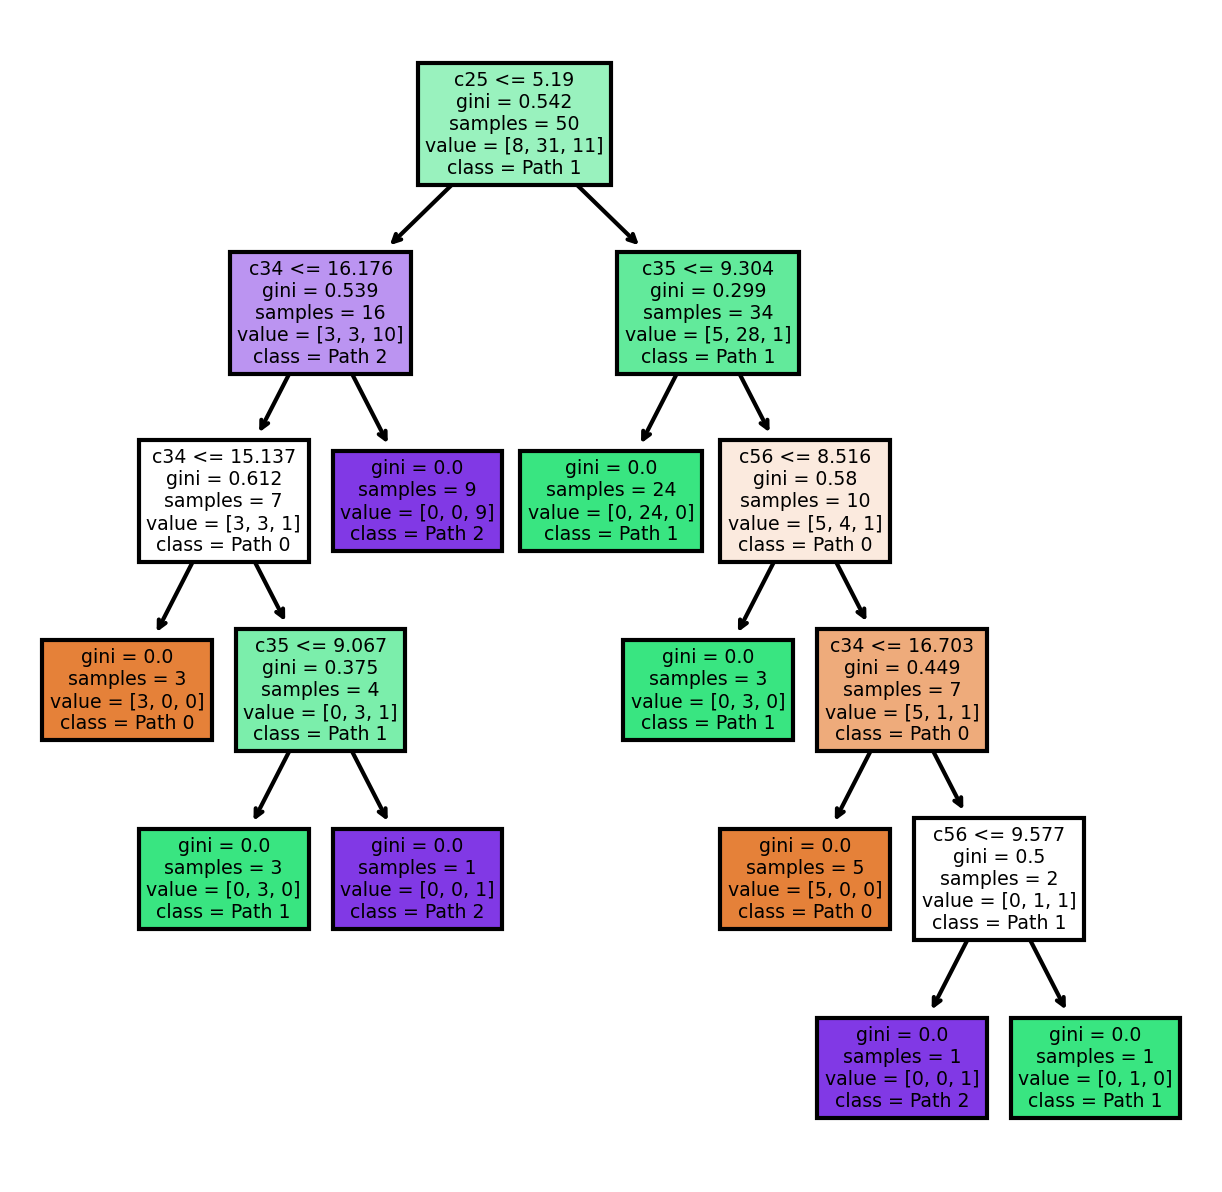

In [49]:
# optimal strategy obtained from Tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(dt2, filled=True, feature_names=['c25', 'c35', 'c34', 'c46', 'c56'], class_names=['Path 0','Path 1','Path 2'])
fig.text(0, 0,'')

The above graph shows the decision rules in the tree model. 

For example, the model will first examine if c25 is smaller or equal to 5.19.

If so (go to the left), the model would then examine if c34 is smaller than or equal to 16.176 . If so, it would further go down the tree plot to predict the optimal pat. Otherwise, it would predict the optimal path as Path 2.




[Path "0" is equivalent to [0, 1, 0, 1, 0, 1, 0] / "Node1-->Node3-->Node4-->Node6" ]

[Path "1" is equivalent to [0, 1, 0, 0, 1, 0, 1] / "Node1-->Node3-->Node5-->Node6"] 

[Path "2" is equivalent to [1, 0, 1, 0, 0, 0, 1] / "Node1-->Node2-->Node5-->Node6" ]

###  (5) Insight from the results 

Insight 1: (Accuracy score difference between problem 1 and problem2) 
    

The general accuracy of all three models in this probelm are smaller than those in problem 1 (naive-setting).
One possible reason could be that we have more features (higher dimension) in probelm 2, i.e. we have five features (𝑐25,𝑐35,𝑐34,𝑐46,𝑐56) in problem 2 versus two only (c1 and c2) in problem 1.
Also we have more arcs in problem 2, rendering problem 2 being more complicated than problem 1.

Insight 2: (Accuracy score difference between decision tree and the other two models within problem2)

Referring to tree graph above, it is possible that the decision tree model could give its prediction result without considering all features (𝑐25,𝑐35,𝑐34,𝑐46,𝑐56). 
Meanwhile, the 'true' decision in problem 2 should be with consideration of all 5 features. 
This could be possible explanation for significant lower accuracy score in decision tree model (72% versus around 85% in Logistic Regression model and SVM model).